In [179]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [205]:
data = pd.read_excel('pl.xlsx')

In [181]:
c = 0
for i in data.columns:
    if c!= 0:
        data[i] = (data[i]-data[i].mean())/(data[i].max()-data[i].min())
    c += 1

In [182]:
X = tf.placeholder(tf.float32, [20], name = 'x')
Y = tf.placeholder(tf.float32, name = 'y')

w = tf.Variable(tf.random_normal([20]), name = 'w')
b = tf.Variable(tf.random_normal([1]), name = 'b')

In [183]:
y_predict = tf.add(tf.multiply(X, w), b)
cost = -tf.reduce_mean(tf.reduce_sum(y_predict*tf.log(Y)+(1-y_predict)*tf.log(1-Y)))
#cost = tf.losses.mean_squared_error(y_predict, Y)
loss = tf.losses.mean_squared_error(y_predict, Y)
optimizer = tf.train.GradientDescentOptimizer(0.1).minimize(cost)

In [188]:
data = data.fillna(0)

In [206]:
data = data[data['频率（G）']==0.720]

In [207]:
data = data[data['0x8'] != 52982373037]

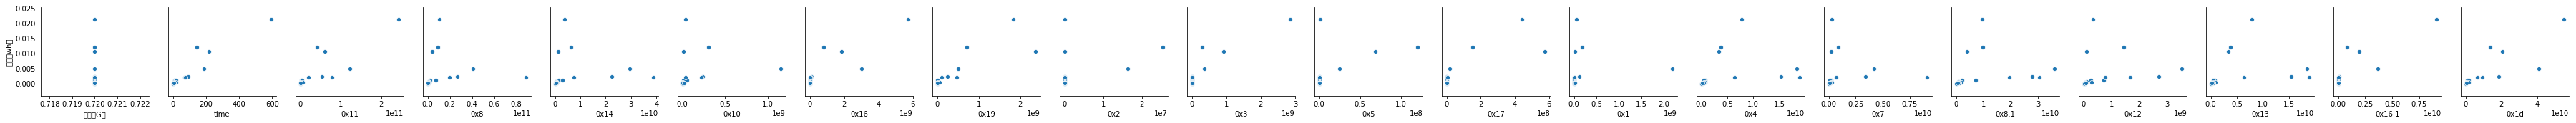

In [208]:
sns.pairplot(x_vars = ['频率（G）','time','0x11','0x8','0x14','0x10','0x16','0x19','0x2','0x3',
                       '0x5','0x17','0x1','0x4','0x7','0x8.1','0x12','0x13','0x16.1','0x1d']
             , y_vars = ['功耗（wh）'], data = data, dropna = True)

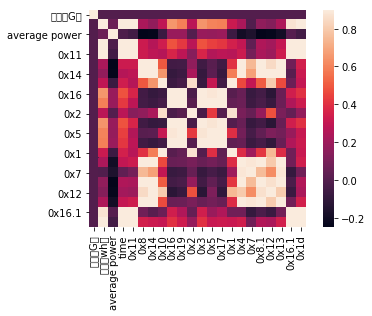

In [204]:
corrmat = data.corr()
plt.subplots()
sns.heatmap(corrmat, vmax = 0.9, square=True)
plt.show()

In [ ]:
train_y = data['功耗（wh）']
data = data.drop(['Program','average power', '功耗（wh）'], axis = 1)

In [174]:
cost_accum = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print("w={},b={}".format(w.eval(),b.eval()))
    for epoc in range(100):
        i = 0
        for x, y in zip(data.values, train_y.values):
            if(y != 0 and i!=0):
                _, train_cost = sess.run([optimizer, cost], feed_dict={X:x, Y:y})
            i += 1
        cost_accum.append(train_cost)
        print("epoc={}".format(epoc))
        print("w={},b={}".format(w.eval(),b.eval()))
        print("cross-entropy is:",str(train_cost))
    
    i = 0
    for x, y in zip(data.values, train_y.values):
        if i == 0:
            train_cost = sess.run(tf.reduce_sum(X*w+b), feed_dict={X:x, Y:y})
            i += 1
            print('predict :', str(train_cost))

#plt.plot(range(len(cost_accum)),cost_accum,'r')
#plt.title('Logic Regression Cost Curve')
#plt.xlabel('epoch')
#plt.ylabel('cost')
#plt.show()


w=[ 0.72595084 -1.8498514  -0.09732351  0.4852552  -1.0165839   0.75421435
  2.4202406  -0.6285352  -0.74040145 -0.15356806  0.40764007  0.42074746
  1.6136491  -1.2450192   0.6516548   0.629787   -0.25801468  0.8480946
 -0.3997322 ],b=[2.0332627]


ValueError: Cannot feed value of shape (20,) for Tensor 'x_9:0', which has shape '(19,)'